#AI&R A3 : Implement Goal Stack Planning
---
Implement goal stack planning for the following configuration from the blocks world.


*   Initial State


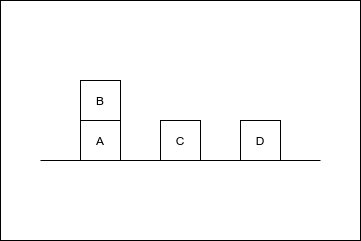


*   Goal State

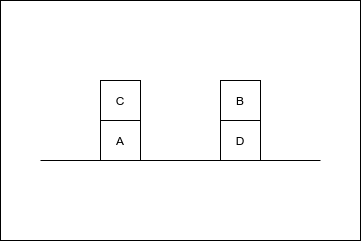



```
# This is formatted as code
```

##Programmer's Persepctive
> S = {s; e; X; Y; Fme; Ff; DD; NDD}

s = initial state
*   ON(B,A) ∧ ONTABLE(A) ∧ ONTABLE(C) ∧ ONTABLE(D)

e = goal state
*   ON(C,A) ∧ ON(B,D) ∧ ONTABLE(A) ∧ ONTABLE(D)

X = {X1}
*   X1 = s

Y = {Y1}
*   Y1 = e

Fme = {f0}
*   f0 = function to perform Goal Stack Planning

Ff = {f1, f2, f3, f4, f5}
where
*   f1 = function to display final path
*   f2 = function to replace unsatisfied goal with an action
*   f3 = function to check if object is predicate
*   f4 = function to check if object is action
*   f5 = function to get status of the arm

DD = List of Predicates of Initial State 

NDD = No non deterministic data

##Theory
*   There is a flat surface on which blocks can be placed
*   There are a number of square blocks, all the same size
*   They can be stacked one upon another
*   There is a robot arm that can manipulate the blocks

##Initial State

### ON(B,A) ∧ ONTABLE(A) ∧ ONTABLE(C) ∧ ONTABLE(D) ∧ CLEAR(B) ∧ CLEAR(C) ∧ CLEAR(D)

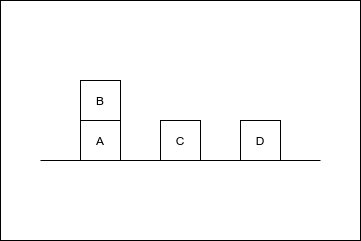

##Perception

###Predicates

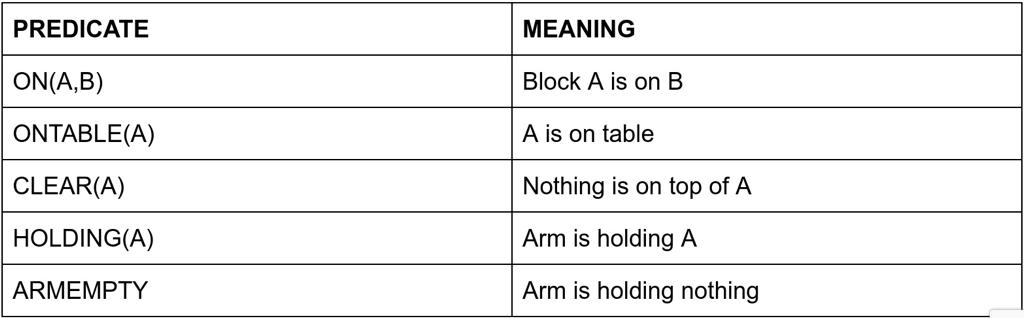

###Logical Statements

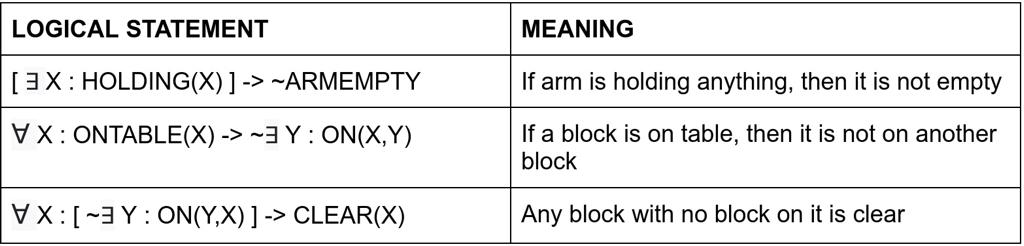

##Cognition

###Goal Stack Planning

####Theory
*   We work backwards from the goal, looking for an operator which has one
or more of the goal literals as one of its effects and then trying to satisfy
the preconditions of the operator.
*   The preconditions of the operator become
subgoals that must be satisfied. We keep doing this until we reach the initial
state.
*   Goal stack planning uses a stack to hold goals and actions to satisfy the
goals, and a knowledge base to hold the current state, action schemas and
domain axioms

####Algorithm
1. Push the goal state on the stack.
2. Repeat until the stack is empty:
  1.  If stack top is a compound goal
    1.    push its unsatisfied subgoals on the stack.
  2.  If stack top is a single unsatisfied goal
    1.    replace it by an action that makes it satisfied
    2.    push the action’s precondition on the stack.
  3.  If stack top is an action
    1.    check for unsatisfied prerequisites
    2.    if all prerequisites are satisfied
        1.    pop action from the stack
        2.    execute it
        3.    change the knowledge base by the action’s effects.
    3.    else
        1.    push unsatisfied preconditions on the stack
  4.  If stack top is a satisfied goal
    1.    pop it from the stack.

##Action

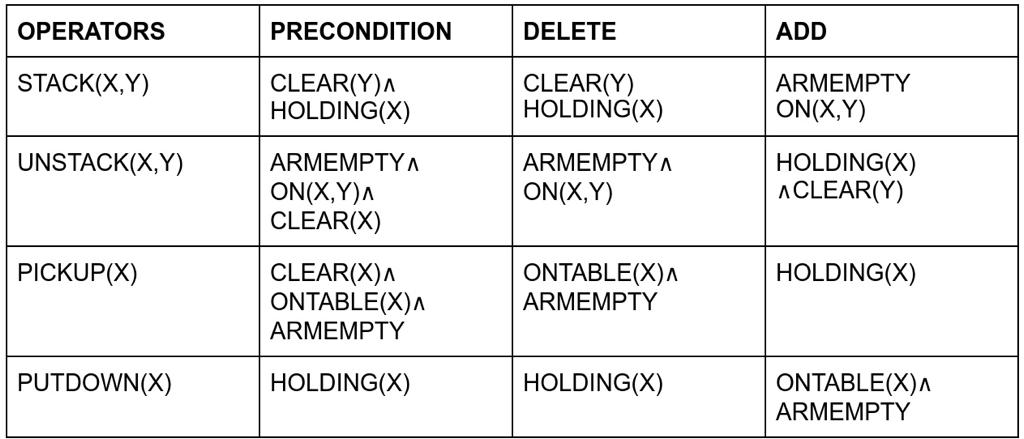

##Goal State

###ON(C,A) ∧ ON(B,D) ∧ ONTABLE(A) ∧ ONTABLE(D) ∧ CLEAR(C) ∧ CLEAR(B)

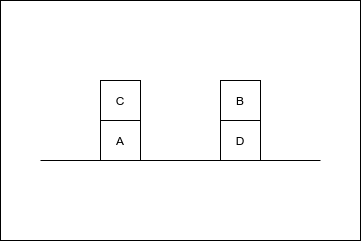

##Main Program

In [11]:
#Base Classes

#PREDICATE - ON, ONTABLE, CLEAR, HOLDING, ARMEMPTY
class PREDICATE:

  #String 
  def __str__(self):
    pass

  #Representation
  def __repr__(self):
    pass
  
  #Checking for Equality
  def __eq__(self, other) :
    pass

  #Making the object Hashable (Useful for set)
  def __hash__(self):
    pass


#OPERATIONS - Stack, Unstack, Pickup, Putdown
class Operation:

  #String
  def __str__(self):
    pass

  #Representation
  def __repr__(self):
    pass
  
  #Checking for Equality
  def __eq__(self, other) :
    pass

  #Return Precondition Predicates
  def precondition(self):
    pass

  #Return Delete Predicates
  def delete(self):
    pass

  #Return Add Predicates
  def add(self):
    pass

In [12]:
class ON(PREDICATE):

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __str__(self):
    return "ON("+self.X+","+self.Y+")"

  def __repr__(self):
    return "ON("+self.X+","+self.Y+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
      return hash(str(self))
  

class ONTABLE(PREDICATE):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "ONTABLE("+self.X+")"

  def __repr__(self):
    return "ONTABLE("+self.X+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
      return hash(str(self))


class CLEAR(PREDICATE):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "CLEAR("+self.X+")"
    self.X = X

  def __repr__(self):
    return "CLEAR("+self.X+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
      return hash(str(self))


class HOLDING(PREDICATE):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "HOLDING("+self.X+")"

  def __repr__(self):
    return "HOLDING("+self.X+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
      return hash(str(self))


class ARMEMPTY(PREDICATE):

  def __init__(self):
    pass

  def __str__(self):
    return "ARMEMPTY"

  def __repr__(self):
    return "ARMEMPTY"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
      return hash(str(self))

In [13]:
class StackOp(Operation):

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __str__(self):
    return "STACK("+self.X+","+self.Y+")"

  def __repr__(self):
    return "STACK("+self.X+","+self.Y+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    clear_y = CLEAR(self.Y)
    holding_x = HOLDING(self.X)
    return [ clear_y , holding_x ]

  def delete(self):
    clear_y = CLEAR(self.Y)
    holding_x = HOLDING(self.X)
    return [ clear_y , holding_x ]

  def add(self):
    armempty = ARMEMPTY()
    on_xy = ON(self.X,self.Y)
    return [ armempty , on_xy ]


class UnstackOp(Operation):

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __str__(self):
    return "UNSTACK("+self.X+","+self.Y+")"

  def __repr__(self):
    return "UNSTACK("+self.X+","+self.Y+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    armempty = ARMEMPTY()
    on_xy = ON(self.X,self.Y)
    clear_x = CLEAR(self.X)
    return [ armempty , on_xy , clear_x ]

  def delete(self):
    armempty = ARMEMPTY()
    on_xy = ON(self.X,self.Y)
    return [ armempty , on_xy ]

  def add(self):
    clear_y = CLEAR(self.Y)
    holding_x = HOLDING(self.X)
    return [ clear_y , holding_x ]


class PickupOp(Operation):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "PICKUP("+self.X+")"

  def __repr__(self):
    return "PICKUP("+self.X+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    clear_x = CLEAR(self.X)
    ontable_x = ONTABLE(self.X)
    armempty = ARMEMPTY()
    return [ clear_x , ontable_x , armempty ]

  def delete(self):
    ontable_x = ONTABLE(self.X)
    armempty = ARMEMPTY()
    return [ armempty , ontable_x ]

  def add(self):
    holding_x = HOLDING(self.X)
    return [ holding_x ]


class PutdownOp(Operation):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "PUTDOWN("+self.X+")"

  def __repr__(self):
    return "PUTDOWN("+self.X+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    holding_x = HOLDING(self.X)
    return [ holding_x ]

  def delete(self):
    holding_x = HOLDING(self.X)
    return [ holding_x ]

  def add(self):
    ontable_x = ONTABLE(self.X)
    armempty = ARMEMPTY()
    return [ armempty , ontable_x ]

In [19]:
initial_state = [

  ON('B','A'),
  
  ONTABLE('A'),
  ONTABLE('C'),
  ONTABLE('D'),

  CLEAR('B'),
  CLEAR('C'),
  CLEAR('D'),

  ARMEMPTY()

]

goal_state = [
              
  ON('B','A'),
  
  ONTABLE('A'),
  ONTABLE('C'),
  ONTABLE('D'),

  CLEAR('B'),
  CLEAR('C'),
  CLEAR('D'),

  ARMEMPTY()
  
]

print("\nInitial State")
for predicate in initial_state:
  print(predicate)

print("\nGoal State")
for predicate in goal_state:
  print(predicate)


Initial State
ON(B,A)
ONTABLE(A)
ONTABLE(C)
ONTABLE(D)
CLEAR(B)
CLEAR(C)
CLEAR(D)
ARMEMPTY

Goal State
ON(B,A)
ONTABLE(A)
ONTABLE(C)
ONTABLE(D)
CLEAR(B)
CLEAR(C)
CLEAR(D)
ARMEMPTY


In [20]:
def isPredicate(obj):
  predicates = [ON, ONTABLE, CLEAR, HOLDING, ARMEMPTY]
  for predicate in predicates:
    if isinstance(obj,predicate):
      return True
  return False

def isOperation(obj):
  operations = [StackOp, UnstackOp, PickupOp, PutdownOp]
  for operation in operations:
    if isinstance(obj,operation):
      return True
  return False

In [21]:
#Function to replace unsatisfied goal with an action
def get_action(unsatisfied_goal, world_state):

  if isinstance(unsatisfied_goal,ON):
    #Stack block X on block Y
    X = unsatisfied_goal.X
    Y = unsatisfied_goal.Y
    return StackOp(X,Y)

  if isinstance(unsatisfied_goal,CLEAR):
      for predicate in world_state:
        #If Block is on another block, unstack
        if isinstance(predicate,ON) and predicate.Y==unsatisfied_goal.X:
          return UnstackOp(predicate.X, predicate.Y)
        #If Block is on table, pickup
        elif isinstance(predicate,ONTABLE) and predicate.X==unsatisfied_goal.X:
          return PickupOp(predicate.X)

  if isinstance(unsatisfied_goal,ARMEMPTY):
      #If Arm is holding a block, put it on the table
      for predicate in world_state:
        if isinstance(predicate,HOLDING):
          return PutdownOp(predicate.X)
  
  elif isinstance(unsatisfied_goal,HOLDING):
    X = unsatisfied_goal.X
    #If block is on table, pick up
    if ONTABLE(X) in world_state:
      return PickupOp(X)
    #If block is on another block, unstack
    else:
      for predicate in world_state:
        if isinstance(predicate,ON) and predicate.X==X:
          return UnstackOp(X,predicate.Y)

In [22]:
def arm_status(world_state):
  #If Arm is holding a block, put it on the table
  for predicate in world_state:
    if isinstance(predicate, HOLDING):
      return predicate
  return ARMEMPTY()

In [23]:
#Store Steps
steps = []

#Program Stack
stack = []

#World State/Knowledge Base
world_state = initial_state.copy()

#Initially push the goal_state as compound goal onto the stack
stack.append(goal_state.copy())

#Repeat until the stack is empty
while len(stack)!=0:

  #Get the top of the stack
  stack_top = stack[-1]

  #Print Variables
  print('\nStack :: ',stack,' <- top')
  print('Arm Status :: ',arm_status(world_state))
  print('World State :: ',world_state)

  #If Stack Top is Compound Goal, push its unsatisfied goals onto stack
  if type(stack_top) is list:
    compound_goal = stack.pop()
    for goal in compound_goal:
      if goal not in world_state:
        stack.append(goal)

  #If Stack Top is an action
  elif isOperation(stack_top):

    #Peek the operation
    operation = stack[-1]

    all_preconditions_satisfied = True

    #Check if any precondition is unsatisfied and push it onto program stack
    for predicate in operation.delete():
      if predicate not in world_state:
        all_preconditions_satisfied = False
        stack.append(predicate)

    #If all preconditions are satisfied, pop operation from stack and execute it    
    if all_preconditions_satisfied:
      
      stack.pop()
      steps.append(operation)

      for predicate in operation.delete():
        world_state.remove(predicate)
      for predicate in operation.add():
        world_state.append(predicate)

    else:

      pass

        
  #If Stack Top is a single satisfied goal
  elif stack_top in world_state:
    stack.pop()

  #If Stack Top is a single unsatisfied goal
  else:
    unsatisfied_goal = stack.pop()

    #Replace Unsatisfied Goal with an action that can complete it
    action = get_action(unsatisfied_goal, world_state)

    #Special Case - If action obtained is Holding, remove Armempty Predicate
    if isinstance(action, HOLDING) and ARMEMPTY() in world_state:
      world_state.remove(ARMEMPTY()) 
    stack.append(action)

    #Push Precondition on the stack
    for predicate in action.precondition():
      if predicate not in world_state:
        stack.append(predicate)

#Printing Variables
print('\nStack :: ',stack,' <- top')
print('Arm Status :: ',arm_status(world_state))
print('World State :: ',world_state)


Stack ::  [[ON(B,A), ONTABLE(A), ONTABLE(C), ONTABLE(D), CLEAR(B), CLEAR(C), CLEAR(D), ARMEMPTY]]  <- top
Arm Status ::  ARMEMPTY
World State ::  [ON(B,A), ONTABLE(A), ONTABLE(C), ONTABLE(D), CLEAR(B), CLEAR(C), CLEAR(D), ARMEMPTY]

Stack ::  []  <- top
Arm Status ::  ARMEMPTY
World State ::  [ON(B,A), ONTABLE(A), ONTABLE(C), ONTABLE(D), CLEAR(B), CLEAR(C), CLEAR(D), ARMEMPTY]


In [9]:
print('Goal State : ', goal_state)
print('World State : ', world_state)
print('Are the two states equal? : ',(set(goal_state)==set(world_state)))

Goal State :  [ON(B,D), ON(C,A), ONTABLE(A), ONTABLE(D), CLEAR(B), CLEAR(C), ARMEMPTY]
World State :  [ONTABLE(A), ONTABLE(D), CLEAR(B), CLEAR(C), ON(C,A), ARMEMPTY, ON(B,D)]
Are the two states equal? :  True


In [10]:
#Steps from Initial State to Goal State
steps

[PICKUP(C),
 PUTDOWN(C),
 UNSTACK(B,A),
 PUTDOWN(B),
 PICKUP(C),
 STACK(C,A),
 PICKUP(B),
 STACK(B,D)]

Start State

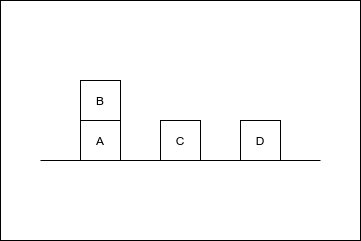

End State

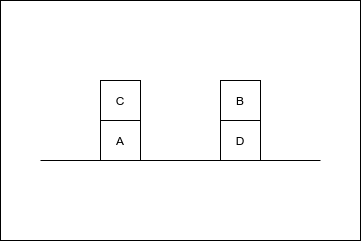

##Start to End Program

In [ ]:
#Base Classes

#PREDICATE - ON, ONTABLE, CLEAR, HOLDING, ARMEMPTY
class PREDICATE:

  #String 
  def __str__(self):
    pass

  #Representation
  def __repr__(self):
    pass
  
  #Checking for Equality
  def __eq__(self, other) :
    pass

  #Making the object Hashable (Useful for set)
  def __hash__(self):
    pass


#OPERATIONS - Stack, Unstack, Pickup, Putdown
class Operation:

  #String
  def __str__(self):
    pass

  #Representation
  def __repr__(self):
    pass
  
  #Checking for Equality
  def __eq__(self, other) :
    pass

  #Return Precondition Predicates
  def precondition(self):
    pass

  #Return Delete Predicates
  def delete(self):
    pass

  #Return Add Predicates
  def add(self):
    pass

class ON(PREDICATE):

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __str__(self):
    return "ON("+self.X+","+self.Y+")"

  def __repr__(self):
    return "ON("+self.X+","+self.Y+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
      return hash(str(self))
  

class ONTABLE(PREDICATE):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "ONTABLE("+self.X+")"

  def __repr__(self):
    return "ONTABLE("+self.X+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
      return hash(str(self))


class CLEAR(PREDICATE):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "CLEAR("+self.X+")"
    self.X = X

  def __repr__(self):
    return "CLEAR("+self.X+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
      return hash(str(self))


class HOLDING(PREDICATE):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "HOLDING("+self.X+")"

  def __repr__(self):
    return "HOLDING("+self.X+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
      return hash(str(self))


class ARMEMPTY(PREDICATE):

  def __init__(self):
    pass

  def __str__(self):
    return "ARMEMPTY"

  def __repr__(self):
    return "ARMEMPTY"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def __hash__(self):
      return hash(str(self))



class StackOp(Operation):

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __str__(self):
    return "STACK("+self.X+","+self.Y+")"

  def __repr__(self):
    return "STACK("+self.X+","+self.Y+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    clear_y = CLEAR(self.Y)
    holding_x = HOLDING(self.X)
    return [ clear_y , holding_x ]

  def delete(self):
    clear_y = CLEAR(self.Y)
    holding_x = HOLDING(self.X)
    return [ clear_y , holding_x ]

  def add(self):
    armempty = ARMEMPTY()
    on_xy = ON(self.X,self.Y)
    return [ armempty , on_xy ]


class UnstackOp(Operation):

  def __init__(self, X, Y):
    self.X = X
    self.Y = Y

  def __str__(self):
    return "UNSTACK("+self.X+","+self.Y+")"

  def __repr__(self):
    return "UNSTACK("+self.X+","+self.Y+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    armempty = ARMEMPTY()
    on_xy = ON(self.X,self.Y)
    clear_x = CLEAR(self.X)
    return [ armempty , on_xy , clear_x ]

  def delete(self):
    armempty = ARMEMPTY()
    on_xy = ON(self.X,self.Y)
    return [ armempty , on_xy ]

  def add(self):
    clear_y = CLEAR(self.Y)
    holding_x = HOLDING(self.X)
    return [ clear_y , holding_x ]


class PickupOp(Operation):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "PICKUP("+self.X+")"

  def __repr__(self):
    return "PICKUP("+self.X+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    clear_x = CLEAR(self.X)
    ontable_x = ONTABLE(self.X)
    armempty = ARMEMPTY()
    return [ clear_x , ontable_x , armempty ]

  def delete(self):
    ontable_x = ONTABLE(self.X)
    armempty = ARMEMPTY()
    return [ armempty , ontable_x ]

  def add(self):
    holding_x = HOLDING(self.X)
    return [ holding_x ]


class PutdownOp(Operation):

  def __init__(self, X):
    self.X = X

  def __str__(self):
    return "PUTDOWN("+self.X+")"

  def __repr__(self):
    return "PUTDOWN("+self.X+")"
    
  def __eq__(self, other) : 
    return self.__dict__ == other.__dict__ and self.__class__ == other.__class__

  def precondition(self):
    holding_x = HOLDING(self.X)
    return [ holding_x ]

  def delete(self):
    holding_x = HOLDING(self.X)
    return [ holding_x ]

  def add(self):
    ontable_x = ONTABLE(self.X)
    armempty = ARMEMPTY()
    return [ armempty , ontable_x ]


initial_state = [

  ON('B','A'),
  
  ONTABLE('A'),
  ONTABLE('C'),
  ONTABLE('D'),

  CLEAR('B'),
  CLEAR('C'),
  CLEAR('D'),

  ARMEMPTY()

]

goal_state = [
              
  ON('B','D'),
  ON('C','A'),
  
  ONTABLE('A'),
  ONTABLE('D'),

  CLEAR('B'),
  CLEAR('C'),

  ARMEMPTY()
  
]

print("\nInitial State")
for predicate in initial_state:
  print(predicate)

print("\nGoal State")
for predicate in goal_state:
  print(predicate)

def isPredicate(obj):
  predicates = [ON, ONTABLE, CLEAR, HOLDING, ARMEMPTY]
  for predicate in predicates:
    if isinstance(obj,predicate):
      return True
  return False

def isOperation(obj):
  operations = [StackOp, UnstackOp, PickupOp, PutdownOp]
  for operation in operations:
    if isinstance(obj,operation):
      return True
  return False

#Function to replace unsatisfied goal with an action
def get_action(unsatisfied_goal, world_state):

  if isinstance(unsatisfied_goal,ON):
    #Stack block X on block Y
    X = unsatisfied_goal.X
    Y = unsatisfied_goal.Y
    return StackOp(X,Y)

  if isinstance(unsatisfied_goal,CLEAR):
      for predicate in world_state:
        #If Block is on another block, unstack
        if isinstance(predicate,ON) and predicate.Y==unsatisfied_goal.X:
          return UnstackOp(predicate.X, predicate.Y)
        #If Block is on table, pickup
        elif isinstance(predicate,ONTABLE) and predicate.X==unsatisfied_goal.X:
          return PickupOp(predicate.X)

  if isinstance(unsatisfied_goal,ARMEMPTY):
      #If Arm is holding a block, put it on the table
      for predicate in world_state:
        if isinstance(predicate,HOLDING):
          return PutdownOp(predicate.X)
  
  elif isinstance(unsatisfied_goal,HOLDING):
    X = unsatisfied_goal.X
    #If block is on table, pick up
    if ONTABLE(X) in world_state:
      return PickupOp(X)
    #If block is on another block, unstack
    else:
      for predicate in world_state:
        if isinstance(predicate,ON) and predicate.X==X:
          return UnstackOp(X,predicate.Y)

def arm_status(world_state):
  #If Arm is holding a block, put it on the table
  for predicate in world_state:
    if isinstance(predicate, HOLDING):
      return predicate
  return ARMEMPTY()

#Store Steps
steps = []

#Program Stack
stack = []

#World State/Knowledge Base
world_state = initial_state.copy()

#Initially push the goal_state as compound goal onto the stack
stack.append(goal_state.copy())

#Repeat until the stack is empty
while len(stack)!=0:

  #Get the top of the stack
  stack_top = stack[-1]

  #Print Variables
  print('\nStack :: ',stack,' <- top')
  print('Arm Status :: ',arm_status(world_state))
  print('World State :: ',world_state)

  #If Stack Top is Compound Goal, push its unsatisfied goals onto stack
  if type(stack_top) is list:
    compound_goal = stack.pop()
    for goal in compound_goal:
      if goal not in world_state:
        stack.append(goal)

  #If Stack Top is an action
  elif isOperation(stack_top):

    #Peek the operation
    operation = stack[-1]

    all_preconditions_satisfied = True

    #Check if any precondition is unsatisfied and push it onto program stack
    for predicate in operation.delete():
      if predicate not in world_state:
        all_preconditions_satisfied = False
        stack.append(predicate)

    #If all preconditions are satisfied, pop operation from stack and execute it    
    if all_preconditions_satisfied:
      
      stack.pop()
      steps.append(operation)

      for predicate in operation.delete():
        world_state.remove(predicate)
      for predicate in operation.add():
        world_state.append(predicate)

    else:

      pass

        
  #If Stack Top is a single satisfied goal
  elif stack_top in world_state:
    stack.pop()

  #If Stack Top is a single unsatisfied goal
  else:
    unsatisfied_goal = stack.pop()

    #Replace Unsatisfied Goal with an action that can complete it
    action = get_action(unsatisfied_goal, world_state)

    #Special Case - If action obtained is Holding, remove Armempty Predicate
    if isinstance(action, HOLDING) and ARMEMPTY() in world_state:
      world_state.remove(ARMEMPTY()) 
    stack.append(action)

    #Push Precondition on the stack
    for predicate in action.precondition():
      if predicate not in world_state:
        stack.append(predicate)

#Printing Variables
print('\nStack :: ',stack,' <- top')
print('Arm Status :: ',arm_status(world_state))
print('World State :: ',world_state)

print('Goal State : ', goal_state)
print('World State : ', world_state)
print('Are the two states equal? : ',(set(goal_state)==set(world_state)))

print(steps)


Initial State
ON(B,A)
ONTABLE(A)
ONTABLE(C)
ONTABLE(D)
CLEAR(B)
CLEAR(C)
CLEAR(D)
ARMEMPTY

Goal State
ON(B,D)
ON(C,A)
ONTABLE(A)
ONTABLE(D)
CLEAR(B)
CLEAR(C)
ARMEMPTY

Stack ::  [[ON(B,D), ON(C,A), ONTABLE(A), ONTABLE(D), CLEAR(B), CLEAR(C), ARMEMPTY]]  <- top
Arm Status ::  ARMEMPTY
World State ::  [ON(B,A), ONTABLE(A), ONTABLE(C), ONTABLE(D), CLEAR(B), CLEAR(C), CLEAR(D), ARMEMPTY]

Stack ::  [ON(B,D), ON(C,A)]  <- top
Arm Status ::  ARMEMPTY
World State ::  [ON(B,A), ONTABLE(A), ONTABLE(C), ONTABLE(D), CLEAR(B), CLEAR(C), CLEAR(D), ARMEMPTY]

Stack ::  [ON(B,D), STACK(C,A), CLEAR(A), HOLDING(C)]  <- top
Arm Status ::  ARMEMPTY
World State ::  [ON(B,A), ONTABLE(A), ONTABLE(C), ONTABLE(D), CLEAR(B), CLEAR(C), CLEAR(D), ARMEMPTY]

Stack ::  [ON(B,D), STACK(C,A), CLEAR(A), PICKUP(C)]  <- top
Arm Status ::  ARMEMPTY
World State ::  [ON(B,A), ONTABLE(A), ONTABLE(C), ONTABLE(D), CLEAR(B), CLEAR(C), CLEAR(D), ARMEMPTY]

Stack ::  [ON(B,D), STACK(C,A), CLEAR(A)]  <- top
Arm Status ::  HOLD

[PICKUP(C),
 PUTDOWN(C),
 UNSTACK(B,A),
 PUTDOWN(B),
 PICKUP(C),
 STACK(C,A),
 PICKUP(B),
 STACK(B,D)]